In [55]:
#pip install celluloid 

# UC MERCED Racoon Movement

### By: Group 5 - Jairo Carreon, Karl Angelo Lerum, Tommy Truong, Brianne  Rouleau 

### Math 150: Mathematical Modeling 

### Mentor: Camille Carvalho 

Last Edited: May 20 2021

## Introduction
An understanding of animals and its relations with the environment can provide valuable information for many studies. These studies include disease prevention and information on endangered or threatened species. More specifically, animal movement helps understand behaviors such as habitat selection, territoriality, mating, and also to understand responses to environmental changes. Raccoons are the most distributed species of the New World family Procyonidae[1]. Meaning that they inhabit wide ranges of environment throughout the United states, especially central California[2]. Raccoons are very adaptable and their movement patterns and social interactions vary with unique factors including climate, habitat, and how much human activity is present within an area [1].  Most studies of raccoons are under the environment of shallow flooded forest areas. UC Merced is a fairly new school, located on a dry land,  with not too much research on wildlife activity on campus. There are many raccoon sightings reported since the beginning of its development.  Since raccoons are very adaptable they might develop a way to coexist with UC students. Their behaviors from other raccoon's might positively or negatively impact students. In this project we investigate the movement patterns of raccoon's depending on where they are around campus. We will use the Random Walkers model and concept to illustrate the movement pattern with groups of raccoons in a specific area and how likely they will move according to where they are located on campus. Random walkers is a mathematical abstract concept, known as a stochastic process, that describes a path that consists of a succession of random steps on some mathematical space [3]. Knowing their behaviors and movement patterns will give a better understanding on where to go and not to go. Although the reality of everything is not random, this model helps approximate movement patterns. In the upcoming sections we present our code of random walkers, numerical and analytical analysis results, and our final thoughts towards this random walkers model.  

### References : 
[1] https://sora.unm.edu/sites/default/files/FFN_25-1p11-21Walker%5B1%5D.pdf
[2]https://en.wikipedia.org/wiki/Procyonidae#:~:text=Procyonidae%20is%20a%20New%20World,environments%20and%20are%20generally%20omnivorous
[3] https://en.wikipedia.org/wiki/Random_walk

# (1) Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from celluloid import Camera

### Code Analysis
Our code starts with importing 3 python libraries:
- Numpy 
- Plotly
- Camera
Numpy is utilized to work with and creating arrays. Plotly provides online graphin, analytics, and statictsics tools. Finally, Camera will create animations which we will be utilizing at the end of our code.

# (2) Initializing Variables

In [2]:
# 1 dimentional case
a = 5 # size of teh space
N = 100 # NUmber of time steps *after* t0
num_walkers = 500 #Number of walkers
dx = 0.1 # length of each step 

###### 2D ##########
dy= 0.1


#### CHANGE THIS ###
x = np.zeros((N+1, num_walkers))
y = np.zeros((N+1, num_walkers))# 2D array of walkers,where the jth column is one walker,
                                # and the ith row is the position
    #### CHANGE THIS #####
    # edit to allow for wide spawning all over map
walker_group=int((num_walkers-num_walkers%4)/4)
#spawns near Summit area
x[0,0:walker_group] = np.random.uniform(-3.6,-3.1, size=walker_group) #Initialization into a narrower range
position = np.linspace(-a,a,num=num_walkers)
y[0,0:walker_group] = np.random.uniform(-3.2, -2.75, size=walker_group) #Initialization into a narrower range
position = np.linspace(-a,a,num=num_walkers)
#spawn near Terraces area
x[0,walker_group:2*walker_group] = np.random.uniform(-4,-3, size=walker_group) #Initialization into a narrower range
position = np.linspace(-a,a,num=num_walkers)
y[0,walker_group:2*walker_group]= np.random.uniform(-0.2, 0.25, size=walker_group) #Initialization into a narrower range
position = np.linspace(-a,a,num=num_walkers)
#spawn near Pavilion
x[0,2*walker_group:3*walker_group] = np.random.uniform(-0.9,-0.3, size=walker_group) #Initialization into a narrower range
position = np.linspace(-a,a,num=num_walkers)
y[0,2*walker_group:3*walker_group] = np.random.uniform(1.9,2.9, size=walker_group) #Initialization into a narrower range
position = np.linspace(-a,a,num=num_walkers)
#spawn near Bellevue lot
x[0,3*walker_group:num_walkers] = np.random.uniform(-0.75,0, size=walker_group) #Initialization into a narrower range
position = np.linspace(-a,a,num=num_walkers)
y[0,3*walker_group:num_walkers] = np.random.uniform(-2.9,-2, size=walker_group) #Initialization into a narrower range
position = np.linspace(-a,a,num=num_walkers)
#print(y[0,:])

### Code Analysis
We initilized variables that would help us create the random walkers and their movement, set up the environment for our random walkers to interact with, as well as, to utilized during the animation section. This variables are :
- a = radius of the environment
- N = Number of iterations
- num_walkers = Number of random walkers/raccoons 
- dx = Length of each step in the x direction
- dy = Length of each step in the y direction

Then, we created 2 arrays which will be holding the x and y position for each random walker by which their ith column will indicate the random walker's iteration and the jth row will indicate the random walker.

For example,

- x[0,3] : the "0" indicates that the random walker is at it's first iteration and the "3" shows its the 4th random walker.

- y[3,5] : the "3" indicates that the random walker is at it's 4th iteration and the "5" shows its the 6th random walker. 

By using numpy function called "random.uniform" we were able to initialized both x and y arrays for their first iteration for each random wlaker with a random value that is within one of four areas in the environment. These areas represent real life places at the University of California Merced:

- Summit Dorms
- Terraces Dorms
- Pavilion Area 
- Bellevue Lot

### Numerical Analysis
The intial condition 'a' was chosen such that it would fit the entire lower half of campus, the dorm area. 'N', time steps and 'num_walkers', number of walkers; were chosen as 100 and 500 respectively as we felt that was areasonible amount to demonstrate the model. The generated walkers themselves were divided into 4 groups to demonstrate the difference in behavior in different parts of the map.

# (3) Constraint Map

In [3]:
boxes = [[-.75,-.50,-0.75,0.5],[-.25,0,-.15,0.6], [0,0.5,0.35,0.6],
         [-.25,0,1.1,1.6],[-.25,0,1.75,2.5],[0,0.25,1.75,2],
         [-1.5,-.5,1.1,1.6], [-1.5,-1,1.85,3.35],[-.25,0,-1.15,-0.4],
         [0,0.5,-0.65,-.4],[-1.2,-.9,-1,0.75], [-.9,-.5,0.65,0.75],
         [-1.6,-1.2,-0.85,0.5],[-1.8,-1.6,-0.75,-0.5],[-.25,0,-1.55,-1.4],
         [-.1,0.15,-1.7,-1.55],[0.05,0.3,-1.85,-1.7], [0.2,0.45,-2,-1.85],
         [0.35,0.6,-1.85,-1.7],[0.5,0.75,-1.7,-1.55],[0.65,0.9,-1.55,-1.4],
         [-.9,-0.6,-1.6,-1.1], [-1,-0.75,-1.75,-1.6], [-1.15,-0.9,-1.9,-1.75],
         [-1.3,-1.05,-2.05,-1.9],[-1.6,-1.05,-1.35,-1.1],[-.85,-0.6,-3.05,-2.9],
         [-1,-.75,-3.2,-3.05], [-1.15,-0.9,-3.35,-3.2], [-1.3,-1.05,-3.5,-3.35],
         [-1.15,-0.9,-2.6,-2.45],[-1.3,-1.05,-2.75,-2.6],[-1.45,-1.2,-2.9,-2.75],
         [-1.75,-1.5,-3.65,-3.5],[-1.9,-1.65,-3.5,-3.35],[-1.95,-1.8,-3.95,-3.8],
         [-2.15,-2,-3.95,-3.8],[-2.35,-2.2,-3.95,-3.8], [-2.45,-2.3,-4.1,-3.95],
         [-2.01,-1.89,-3.72,-3.63],[-0.75,-0.25,2.95,3.45],[-0.25,0.25,3.2,3.7],
         [0.25,0.75,3.45,3.95],[0.75,1.25,3.7,4.2],[0.45,0.7,2.95,3.2],
         [-4.5,-4.05,-0.5,0.95], [-3.9,-2.1,0.5,0.95],[-2.9, -2.1, -0.35, 0.15],
         [-3.02,-2.6,-1,-0.7],[-2.49,-2.15,-1,-0.6],[-3.7,-3.55,-1.01 ,-0.49],
         [-3.4,-3.25,-1.01 ,-0.49],[-3.6,-3.4,-1.4 ,-1.1],[-3.1 ,-2.9, -1.3,-1.06],
         [-2.8,-2.5,-1.5 ,-1.1],[ -2.4,-2.1,-1.7 ,-1.3], [ -2.8,-2.5,-2 ,-1.6],
         [ -2.4,-2.1,-2.2 ,-1.8], [ -3.2,-2.96,-1.9 ,-1.5,], [-2.5,7/6-3.5,-4/6-2.3,-2.3],
         [4/6-3.5,6/6-3.5,-2.5/6-2,-1/6-2] , [5.5/6-3.85,7/6-3.85,-7.5/6 -2,-5/6-2],
         [4/6-4,7/6-4,-9/6-2,-7.5/6-2], [4/6-4.2,6/6-4,-2.5/6-1.9,-1/6-1.9], 
         [4/6-4,6/6-4.1,-4/6-2,-2.5/6-1.9],[5.5/6-4.85,7/6-4.85,-5/6-3,-7.5/6 -1.5],
         [-4,1.5/6-4,-7.5/6-3.5,-5/6-3.5], [-4.5,-2.1,1.1,1.8]
          ]

### Code Analysis
These part of the code creates an array which we call "boxes" which takes in arrays with 4 values. The values are the dimensions of the area that the random walkers cannot be located in. So to be precise, the first 2 values will be use to create a horizontal constraint and the last 2 values will be use to create a vertical constraint.

Box is a double array that contains the dimensions for each box constraints. 
For example, 
    [[x1,x2,y1,y2] , [x3,x4,y3,y4]]


### Numerical Analysis
The Buildings and other obstacles mapped as boxes includes the following:
Granite Pass,
Glacier Point,
Arts and Computational Science,
Pavilion,
Sustainability Research and Engineering,
Sentinal Rock,
Little Lake,
EL Portal,
Administration,
Conference Center,
Transit Center,
Health and Athletics Center,
Competition Pool,
Water Pump House,
Biomedical Sciences and Physics,
Green House,
Sierra Terraces,
Yablokoff-Wallace Dining Center,
Terrace Center,
Valley Terraces,
The Summits,
Early Childhood Education Center.

In [4]:
def box_constraint_map(x1,x2,y1,y2,ax1,c):
    ax1.hlines(y1,x1,x2,color=c)
    ax1.hlines(y2,x1,x2,color=c)
    ax1.vlines(x1,y1,y2,color=c)
    ax1.vlines(x2,y1,y2,color=c)

### Code Analysis
Our first function is called "box_constraint_map" which takes in the dimensions of the boxes, an axis created by matplotlib, and a value for a color. In this function, we use the axis' functions called hlines and vlines which will create a drawing of the constraints in the environment. 

In [5]:
def fill_map(): 
    plt.fill_between(x=[-.75,-.5], y1= -.75, y2=.5, color='c')
    plt.fill_between(x=[-.25,0], y1= -.15, y2=.6, color='c')
    plt.fill_between(x=[0,0.5], y1= .35, y2=.6, color='c')
    
    plt.fill_between(x=[-.25,0], y1= 1.1, y2=1.6, color='c')
    plt.fill_between(x=[-.25,0], y1= 1.75, y2=2.5, color='c')
    plt.fill_between(x=[0,0.25], y1= 1.75, y2=2, color='c')
    
    plt.fill_between(x=[-1.5,-0.5], y1= 1.1, y2=1.6, color='c')
    plt.fill_between(x=[-1.5,-1.], y1= 1.85, y2=3.35, color='c')
    plt.fill_between(x=[-.25,0], y1= -1.15, y2=-0.4, color='c')

    plt.fill_between(x=[0,0.5], y1= -0.65, y2=-0.4, color='c')
    plt.fill_between(x=[-1.2,-0.9], y1= -1., y2=0.75, color='c')
    plt.fill_between(x=[-.9,-0.5], y1= 0.65, y2=0.75, color='c')
    
    plt.fill_between(x=[-1.6,-1.2], y1= -0.85, y2=0.5, color='c')
    plt.fill_between(x=[-1.8,-1.6], y1= -0.75, y2=-0.5, color='c')
    plt.fill_between(x=[-.25,0], y1= -1.55, y2=-1.4, color='c')
   
    plt.fill_between(x=[-.1,0.15], y1= -1.7, y2=-1.55, color='c')
    plt.fill_between(x=[0.05,0.3], y1= -1.85, y2=-1.7, color='c')
    plt.fill_between(x=[.2,0.45], y1= -2., y2=-1.85, color='c')
    
    plt.fill_between(x=[.35,0.6], y1= -1.85, y2=-1.7, color='c')
    plt.fill_between(x=[0.5,0.75], y1= -1.7, y2=-1.55, color='c')
    plt.fill_between(x=[.65,0.9], y1= -1.55, y2=-1.4, color='c')

    plt.fill_between(x=[-.9,-0.6], y1= -1.6, y2=-1.1, color='c')
    plt.fill_between(x=[-1,-0.75], y1= -1.75, y2=-1.6, color='c')
    plt.fill_between(x=[-1.15,-0.9], y1= -1.9, y2=-1.75, color='c')

    plt.fill_between(x=[-1.3,-1.05], y1= -2.05, y2=-1.9, color='c')
    plt.fill_between(x=[-1.6,-1.05], y1= -1.35, y2=-1.1, color='c')
    plt.fill_between(x=[-.85,-0.6], y1= -3.05, y2=-2.9, color='c')

    plt.fill_between(x=[-1.,-.75], y1= -3.2, y2=-3.05, color='c')
    plt.fill_between(x=[-1.15,-.9], y1= -3.35, y2=-3.2, color='c')
    plt.fill_between(x=[-1.3,-1.05], y1= -3.5, y2=-3.35, color='c')

    plt.fill_between(x=[-1.15,-.9], y1= -2.6, y2=-2.45, color='c')
    plt.fill_between(x=[-1.3,-1.05], y1= -2.75, y2=-2.6, color='c')
    plt.fill_between(x=[-1.45,-1.2], y1= -2.9, y2=-2.75, color='c')

    plt.fill_between(x=[-1.75,-1.5], y1= -3.65, y2=-3.5, color='c')
    plt.fill_between(x=[-1.9,-1.65], y1= -3.5, y2=-3.35, color='c')
    plt.fill_between(x=[-1.95,-1.8], y1= -3.95, y2=-3.8, color='c')

    plt.fill_between(x=[-2.15,-2.], y1= -3.95, y2=-3.8, color='c')
    plt.fill_between(x=[-2.35,-2.2], y1= -3.95, y2=-3.8, color='c')
    plt.fill_between(x=[-2.45,-2.3], y1= -4.1, y2=-3.95, color='c')

    plt.fill_between(x=[-2.01,-1.89], y1= -3.63, y2=-3.68, color='c')
    plt.fill_between(x=[-0.75,-0.25], y1= 2.95, y2=3.45, color='c')
    plt.fill_between(x=[-0.25,0.25], y1= 3.2, y2=3.7, color='c')

    plt.fill_between(x=[0.25,0.75], y1= 3.45, y2=3.95, color='c')
    plt.fill_between(x=[0.75,1.25], y1= 3.7, y2=4.2, color='c')
    plt.fill_between(x=[0.45,.7], y1= 2.95, y2=3.2, color='c')

    plt.fill_between(x=[-4.5,-4.05], y1= -.5, y2=0.95, color='c')
    plt.fill_between(x=[-3.9,-2.1], y1= .5, y2=0.95, color='c')
    plt.fill_between(x=[-2.9,-2.1], y1= -0.35, y2=0.15, color='c')

    plt.fill_between(x=[-3.02,-2.6], y1= -1., y2=-0.7, color='c')
    plt.fill_between(x=[-2.49,-2.15], y1= -1., y2=-0.6, color='c')
    plt.fill_between(x=[-3.7,-3.55], y1= -1.01, y2=-0.49, color='c')
    
    plt.fill_between(x=[-3.4,-3.25], y1= -1.01, y2=-0.49, color='c')
    plt.fill_between(x=[-3.6,-3.4], y1= -1.4, y2=-1.1, color='c')
    plt.fill_between(x=[-3.1,-2.9], y1= -1.3, y2=-1.06, color='c')

    plt.fill_between(x=[-2.8,-2.5], y1= -1.5, y2=-1.1, color='c')
    plt.fill_between(x=[-2.4,-2.1], y1= -1.7, y2=-1.3, color='c')
    plt.fill_between(x=[-2.8,-2.5], y1= -2., y2=-1.6, color='c')

    plt.fill_between(x=[-2.4,-2.1], y1= -2.2, y2=-1.8, color='c')
    plt.fill_between(x=[-3.2,-2.96], y1= -1.9, y2=-1.5, color='c')
    plt.fill_between(x=[-2.5,7/6-3.5], y1= -4/6-2.3, y2=-2.3, color='c')

    plt.fill_between(x=[4/6-3.5,6/6-3.5], y1= -2.5/6-2, y2=-1/6-2, color='c')
    plt.fill_between(x=[5.5/6-3.85,7/6-3.85], y1= -7.5/6-2, y2=-5/6-2, color='c')

    plt.fill_between(x=[4/6-4,7/6-4], y1= -9/6-2, y2=-7.5/6-2, color='c')
    plt.fill_between(x=[4/6-4.2,6/6-4], y1= -2.5/6-1.9, y2=-1/6-1.9, color='c')

    
    plt.fill_between(x=[4/6-4,6/6-4.1], y1= -4/6-2, y2=-2.5/6-1.9, color='c')
    plt.fill_between(x=[7/6-4.85,5.5/6-4.85], y1= -5/6-3, y2=-7.5/6-1.5, color='c')

  
    plt.fill_between(x=[-4,1.5/6-4], y1= -7.5/6-3.5, y2=-5/6-3.5, color='c')
    plt.fill_between(x=[-4.5,-2.1], y1= 1.1, y2=1.8, color='c')

### Code Analysis
The function "fill_map" fills in the boxes drawn in the environment.

In [6]:
# expand more areas of bias taking into account possible locations of racoon dens and food sources
area=[[-1.5,-.5,0.85,1.1],[-1.5,-.5,1.6,1.85],[-1.75,-1.5,1.1,1.6],[-.5,-.25,1.1,1.6],
      [-2.9,-2.1,-0.6,-0.35],[-2.9, -2.1,0.15,0.4],[-3.15,-2.9, -0.35, 0.15],[-2.1,-1.85, -0.35, 0.15],
     [-4.5,1,-4,-1]]

### Code Analysis
we create an array called "area" which intakes an array with four values which represent the area of bias taking into account possible locations of racoon dens and food sources.

### Numerical Analysis 
The areas include: the surroundings of the Pavilion and Yablokoff-Wallace Dining Center as well as a lower field to direct all racoons below the dining centers up in order emulate the racoons movement behavior incorrespondance to their search for food.

# (4) Constraint Movement

In [7]:
def box_constraint_movement(x,y,x0,y0,boxes):
    for i in boxes:
        if((x >= i[0]) and (x <= i[1]) and (y >= i[2]) and (y <= i[3])):
            x = x0 
            y = y0
    return x,y 

### Code Analysis
This function is called "box_constraint_movement" which takes in the current and last x and y location of a random walker, and the array "boxes". In this function, we iterate throught the array "boxes" and in case the x and y location are within the boxes' values we return the last x and y location values.

In [8]:
def area_constraint_movement(x,y,area):
    z=0
    for i in area:
        if((x >= i[0]) and (x <= i[1]) and (y >= i[2]) and (y <= i[3])):
            if(z%4==1):
                return [0.2,0.4,0.6]
            if(z%4==2):
                return [0.4,0.6,0.8]
            if(z%4==3):
                return [0.2,0.6,0.8]
            if(z%4==0):
                return [0.2,0.4,0.8]
        z=z+1
    return [0.25,0.5,0.75]
    

### Code Analysis
The next function is called "area_constraint_movement" which takes in the previous x and y position for each random walker and a list which indicates the attraction areas in the environment. This function compares the last location of a random walker to the attraction area and if the random walker is within the area it will change the probabilty of movement accordingly.   

### Numerical Analysis
The probabilities were chosen to slightly scew the movements of the racoons towards the dining centers when within the area but retain equal chance to move any direction when outside of the area.

# (5) Creates the movement for each Random Walker

In [9]:
for i in range(1, N+1):
    s =  np.random.uniform(size = num_walkers)
    for j in range(1,num_walkers):
        move=area_constraint_movement(x[i-1,j], y[i-1,j],area)
        if(s[j] <= move[0]):
            x[i,j] = x[i-1,j] + dx
            y[i,j] = y[i-1,j]
        elif((s[j] > move[0]) & (s[j]<=move[1])):
            x[i,j] = x[i-1,j] - dx
            y[i,j] = y[i-1,j]
        elif((s[j] > move[1]) & (s[j]<= move[2])):
            x[i,j] = x[i-1,j]
            y[i,j] = y[i-1,j] + dy
        elif(s[j] > move[2]):
            x[i,j] = x[i-1,j]
            y[i,j] = y[i-1,j] - dy
        x[i,j], y[i,j]= box_constraint_movement(x[i,j],y[i,j],
                                                x[i-1,j],y[i-1,j],boxes)

### Code Analysis
we make a for loop in order to iterate through all the steps taken by the random walkers. Inside the for loop, we create an array sized the amount of random walkers called "s"  containing random numbers between 0 and 1. With the values located at "S" we can determine if a random walker will move left/right and down/up.The, we have anotehr for loop to itarate through all the random walkers. in here we call the function "area_constraint_movement" and stored the result into a variable called "move". Next, we have a series of if-else statements which compare the values of the "s" and "move" arrays. Inside the if statemnets, the random walkers' both x and y location will be increased/decreased. Finally, we call the function "box_constraint_movement" to check if any of the random walkers are in an restricted area. 

### Numerical Analysis

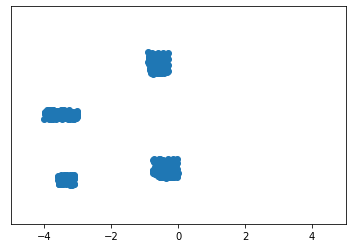

In [10]:
fig, ax1 = plt.subplots()
ax1.set_xlim((-a,a))
ax1.set_ylim((-a,a))
plt.yticks([])
ax1.scatter(x[0,:], y[0,:])

This code confirms that the racoons are indeed spawn into 4 distinct intial parts of the map

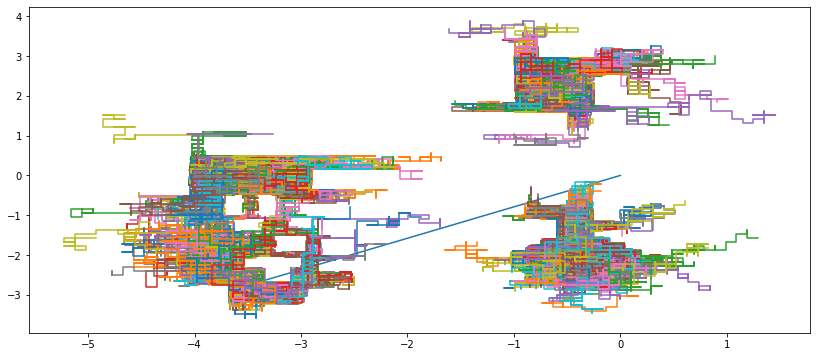

In [11]:
fig = plt.figure()
plt.plot(x,y)
fig.set_size_inches(14,6)

This code creates a 2d graph of the movement patterns of the raccoon over time. Notice that the outlines of some of the buildings can be seen; this demonstrates that the box constraint codes are working properly and the racoons are not entering any buildings. There also seems to be slight favortism for upward movement likely caused by the areas constraints. Also notice that the buildings most visible are those between the racoons starting poaints and the dining centers; suggesting that the racoons are generally approaching the dining centers. However, despite these biases, the racoon movement doesnt suggest any drastic movement in any partcualar direction and is mostly uniform.

# (6) Racoon Model

In [12]:
from ipywidgets import interact

@interact
def interact_walker(i:(0,N,1) = 0):
    fig, ax1 = plt.subplots(1,1,figsize=(10,10))
    ax1.set_xlim((-a,a))
    ax1.set_ylim((-a,a))
 
    # CREATES BOXES IN GRAPH 
    for b in boxes:
        box_constraint_map(b[0],b[1],b[2],b[3],ax1,'c')
    for b in area:
        box_constraint_map(b[0],b[1],b[2],b[3],ax1,'r')
    plt.yticks([])
    ax1.scatter(x[i,:], y[i,:],s=60,marker='^', zorder = 100,c=range(num_walkers))
    plt.grid(True)
    fill_map()

interactive(children=(IntSlider(value=0, description='i'), Output()), _dom_classes=('widget-interact',))

### Code Analysis
By importing the library interact, we are able to create an interactive envrinment which let's us see each step of our random walkers in an animation. By creating a function called "interact_walker" which will go through all the random walkers steps. Also, by using the library plotly, we created an invironment 10 by 10 sized which the random walkers will not be able to go beyond thanks to the functions "set_xlim" and "set_ylim" provided by plotly. Next, we had a 2 different for loops: one iterating through the boxes array and the other one iterating through the area array. In both of them they call the function "box_constraint_map" in other to draw the buildings in the envirnment and the attraction area for the raccons, respectvely. Finally, we use the "scatter" plotly function to plot all the random walkers, and use the "fill_map" function to filling  the buildings with their color.

### Numerical Analysis

This is the actual model it self.It is the map of the UC Merced campus. Note that this map is not to scale nor all encompassing of campus. The map here represents the general shape of the dorm area below the Fairfield Canal as of Spring 2021.The  cyan filled areas of the map includes large bodies that may impede racoon movement such as buildings and large bodies of water like the Little Lake. The racconc themselves are represented by the colorful triangle figures. Notice these triangles follow a color closly shared color scheme with those that spawn in the same area. This helps to show how diffeernet intial conditions affect the where the raccoons end up. This map also includes red rectangular areas that depict a change in raccon movement.They are met to represent the change in raccoon behavior relative to location. The overall map outside the red areas gives the raccoons equal chance to move in any direction. The area surrounding 2 particular building, the Pavilion and Yablokoff-Wallace Dining Centers, have the probability scewed such that it will lead raccons to move towards the Dining Centers for food. There also exists a larger red area encompassing the lower section of the map below these two buildings. To ensure that raccoon movements are to move towards the dining centers. However due to this large area encompasses almost half the map and no negating area( there is no area that proposes the oppossite probaility of equal size like the area surrounding the dining centers) this has impacted the overall movement patterns of raccoon to move upwards. 

Interacting with the model confirms the behavior layed out by the previous two graphs. The overall movement seems to be mostly uniform with a slight upwards bias. This suggests that the governing equation would be an diffusion-advection equation depicting slighly upwards movement. This is further explaind in the Analystic results.

Though this model does an excellent job of depicting raccoon behavior in terms of their search for food, it is far from an encompassing model that shows raccoon movement as a whole.If this model holds true to real life raccoon behavior on campus, it would suggest that we would most likely beable to find raccoons surrounding the dining centers and its immediately surrounding buildings. This matches the experience of many memebers of the UC Merced community. The raccoons at UC Merced are most often encountered in this lower area of campus surrounding the dormatories, hence the decision to only model this portion of campus. The inclusion of the upper half of campus past the canal or at the very leat the representative of the raccoon behavior of the area with an oppossing similarred area equivalent to the one responsible for the upward movement would likely lead the overall movement downwards help depict more accurate behavior of raccoons on campus as a whole. Other solution may include more detaild represebtation of raccoon movement that would include points that either attracts of deture raccoons as opposed to areas that completely change the probability of of movement into a certain direction. This sort of implementation could account for things like raccoon nests, trash bins, vending machines, and other areas of interest for the raccoons. The implementation of such an idea was attempted, however as it's implementation were simpily visuals and do not impact the model it was excluded. Stuggling to implement individual points of attraction in this manner we opted to continue with the areas method implemented in this code. The inclusion of things such as variation in movement speed and predators amongst other attributes could have also been considered and included to create a more accurate model.

### Analytic Results

For each time step, each raccoon will move either right, left, up or down. The probability of a raccoon moving in a certain direction depends on where it is on the map. For the majority of the map (all areas outside of red rectangles), each raccoon has a 1/4 probability of moving to the right, a 1/4 probability of moving to the left, a 1/4 probability of moving up, and a 1/4 probability of moving down for each time step.  We first wish to find an equation that describes the motion of the raccoons when they are outside of the red rectangles. 

To do so, we can let $C(x,y,t)$ be the expectation of the walkers to be in the window, $\Delta x$, $\Delta y$ at time t. This means that the expectation of the walkers at time $t+\Delta t$ will be given as the sum of the expectations of the number of walkers coming from the left, the right, up and down. 

In other words, 
$$C(x,y, t+\Delta t)= \frac{1}{4}C(x+\Delta x, y, t) + \frac{1}{4}C(x-\Delta x, y, t) + \frac{1}{4}C(x, y + \Delta y, t) + \frac{1}{4}C(x, y - \Delta y, t)$$

$$C(x, y, t+\Delta t) - C(x, y, t) = \frac{1}{4}C(x+\Delta x, y, t) + \frac{1}{4}C(x-\Delta x, y, t) + \frac{1}{4}C(x, y + \Delta y, t) + \frac{1}{4}C(x, y - \Delta y, t)  - C(x, y, t) $$

$$C(x, y, t+\Delta t) - C(x, y, t) = \frac{1}{4}[C(x+\Delta x, y, t) - 2C(x, y, t)+ C(x-\Delta x, y, t)] + \frac{1}{4}[C(x, y + \Delta y, t) - 2C(x, y, t) + C(x, y - \Delta y, t)] $$

$$\frac{C(x, y, t+\Delta t) - C(x, y, t)}{\Delta t} = \frac{\frac{1}{4}[C(x+\Delta x, y, t) - 2C(x, y, t)+ C(x-\Delta x, y, t)]}{\Delta t}\frac{\Delta x^2}{\Delta x^2} + \frac{\frac{1}{4}[C(x, y + \Delta y, t) - 2C(x, y, t) + C(x, y - \Delta y, t)]}{\Delta t}\frac{\Delta y^2}{\Delta y^2} $$

Letting $\frac{\Delta x^2}{\Delta t} = D_x$ and $\frac{\Delta y^2}{\Delta t} = D_y$ and recognzing the second order centeral difference formulas above, we get

$$\frac{\partial C}{\partial t} = \frac{1}{4}D_x\frac{\partial^2 C}{\partial x^2} + \frac{1}{4}D_y\frac{\partial^2 C}{\partial y^2}$$

From this, we can see that the heat equation can describe the motion of the raccoons (assuming they are outside the red rectangles) and not at the boundary conditions of the buildings. This means that the movement of the raccoons (assuming they are outside the red rectangles) is similar to the diffusion of heat in our model.


However, we know that raccoons will not diffuse randomly like heat if there are certain areas that the raccoons are attracted to on the campus. For example, we assume that the raccoons are more likely to move towards areas with food, such as the Pavillion. To take this into account in our code, there are areas of bias (shown as red rectangles in the map). This is done by changing the probabilities of each raccoon moving up, down, left, or right when they are in the area of bias (the red rectangles). Taking this into account, this has created a slight bias for the raccoons to move up rather than down in our model. We then estimate the probabilities as follows. A 0.25 probability to move left, a 0.25 probability to move right, a 0.3 probability to move up, and a 0.2 probability to move down. While the exact numbers are an estimation, overall we do know that there is a slight bias for the raccoons to move up rather than down and these numbers reflect that. Now, we wish to find an equation that describes the motion of the raccoons that takes this bias to move up rather than down into account. 

Once again, we let $C(x,y,t)$ be the expectation of the walkers to be in the window, $\Delta x$, $\Delta y$ at time t. This means that the expectation of the walkers at time $t+\Delta t$ will be given as the sum of the expectations of the number of walkers coming from the left, the right, up ,and down. 

$$C(x,y, t+\Delta t)= \frac{1}{4}C(x+\Delta x, y, t) + \frac{1}{4}C(x-\Delta x, y, t) + \frac{1}{5}C(x, y + \Delta y, t) + \frac{3}{10}C(x, y - \Delta y, t)$$

$$C(x,y, t+\Delta t)= \frac{1}{4}C(x+\Delta x, y, t) + \frac{1}{4}C(x-\Delta x, y, t) + (\frac{1}{4} - \frac{1}{20})C(x, y + \Delta y, t) +  (\frac{1}{4} + \frac{1}{20})C(x, y - \Delta y, t)$$

$$C(x, y, t+\Delta t) - C(x, y, t) = \frac{1}{4}C(x+\Delta x, y, t) + \frac{1}{4}C(x-\Delta x, y, t) + (\frac{1}{4} - \frac{1}{20})C(x, y + \Delta y, t) + (\frac{1}{4} + \frac{1}{20})C(x, y - \Delta y, t)  - C(x, y, t) $$

$$C(x, y, t+\Delta t) - C(x, y, t) = \frac{1}{4}[C(x+\Delta x, y, t) - 2C(x, y, t)+ C(x-\Delta x, y, t)] + \frac{1}{4}[C(x, y + \Delta y, t) - 2C(x, y, t) + C(x, y - \Delta y, t)] + \frac{1}{20}[C(x, y - \Delta y, t) - C(x, y + \Delta y, t)] $$

$$\frac{C(x, y, t+\Delta t) - C(x, y, t)}{\Delta t} = \frac{\frac{1}{4}[C(x+\Delta x, y, t) - 2C(x, y, t)+ C(x-\Delta x, y, t)]}{\Delta t}\frac{\Delta x^2}{\Delta x^2} + \frac{\frac{1}{4}[C(x, y + \Delta y, t) - 2C(x, y, t) + C(x, y - \Delta y, t)]}{\Delta t}\frac{\Delta y^2}{\Delta y^2} + \frac{\frac{1}{20}[C(x, y - \Delta y, t) - C(x, y + \Delta y, t)]}{\Delta t}$$

We replace $\frac{\frac{1}{20}}{\Delta t}$ by $\frac{U}{\Delta 2y}$, $\frac{\Delta x^2}{\Delta t}$ by $D_x$, and $\frac{\Delta y^2}{\Delta t}$ by $D_y$. Then recognizing the first and second order centeral differences we get

$$\frac{\partial C}{\partial t} = \frac{1}{4}D_x\frac{\partial^2 C}{\partial x^2} + \frac{1}{4}D_y \frac{\partial^2 C}{\partial y^2} - U\frac{\partial C}{\partial y}$$

From this it can be seen that once there is a bias in the movement of the raccoons (as implemented in the areas of the red rectangles), the raccoons' movements can no longer be described by the diffusion of heat. Instead their movement can be described with the advection diffusion equation.

# Conclusion (Tommy)
In this project we sought to investigate the movement patterns of the UC Merced's raccoon population. As students of this university we are aware of the frequent raccoon sightings around the dormatories of the school. Speculating that their appearances near the dorms are most likely assocaited with their search for food; we devised a random walker model of the area, in which raccoon movement towrds the dining centers were favored. To my surprise the movement was rather uniform with only a slight bias for upwards movement. I supposed that's acurrate as raccoon sightings are known to appear across the area mapped but I would have guessed a greater density of raccoons to be near the dining centers. Transcribing our findings, with reasonable guesses for the probabilty rates, into the equation for random walkers; we found that it simplifies into the advection diffusion equation for upwards movement. There are a variety of factors that coud be implemented to improve upon the model; such as a predator, location of raccoon dens, difference in movement speed, inclusion of the upper half of campus, etc. I found this opportunity to combine the knowledge I have been accumlating throughout college to be very fun. If was quite satisfying to watch the project come together step by step. The project gave me much needed experience on applying mathematics to real life scenarios and I believe that has helped me further understand those concepts. The report as a whole was a team effort and I believe everyone contributed their fair share. I found Jairo's proof reading of the code very helpful. Brianne's understanding of the course material was unmatched and went a long way to help derive the governing equation of the model. And Karl did an excellent job on ensuring we were able to meet regularly and complete the whatever goals we had for the week. It was a great group and it was a pleasure working with all of them.